# Introducrtion to Machine Learning: Assignment #2
## Submission date: 21\02\2024, 23:59.
### Topics:
- Perceptron
- Logistic Regression
- Gradient Descent
- SVM
- Kernels

Submitted by:

 **Student 1 Ahmad Igbaria + 322751041

 **Student 2 elias daw +314934092

**Assignment Instruction:**

· Submissions in pairs only.

· The code must be reasonably documented

· Try to keep the code as clean, concise, and short as possible

· Your submission must be entirely your own. Any attempts of plagiarism (including ChatGPT) will lead to disciplinary actions.

· You should save a copy of the notebook to your Drive and answer all the questions inside the notebook, at the designated cells. Only the notebook will be submitted in moodle (in `.ipynb` format).

· If you wish to work in your IDE, make a `.py` copy of the notebook, but as you finish insert the script back to the matching cells of the notebook.

**Important:** All plots, results and outputs should be included in the notebook as the cells' outputs (run all cells and do not clear the output).

<b>Note:</b> Pay attention to the labels in the the different datasets (0/1) and that some of the learned algorithms work with labels (-1/1).

## Question 1 - Logistic regression

You will implement a claaisifer to predict wether client will buy a SUV car or not. <br/>
The prediction will be done by the client's age, gender and salary. <br/>
The label is 1 when bought and 0 otherwise.

import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


plotting function

In [73]:
from mpl_toolkits.mplot3d import Axes3D

def plot(data, labels, w, bias):
    a, b, c = w[0], w[1], w[2]
    d = bias

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='coolwarm')

    # Create a meshgrid for the hyperplane
    xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))
    z = (-a * xx - b * yy - d) * 1.0 / c

    # Plot the hyperplane
    ax.plot_surface(xx, yy, z, alpha=0.4)
    ax.azim += 30
    ax.elev += 10

    # Customize the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('3D Scatter Plot with Hyperplane')
    plt.show()


In [77]:
df = pd.read_csv('https://sharon.srworkspace.com/ml/datasets/hw2/suv_data.csv')
print(df.head(3))


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0


After looking at the data, drop irrelevant features (such that have no learnability meaning) and make sure your remaining features are numeric.
**bold text**


In [78]:
df = df.drop(columns=['User ID'])  # remove id
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
print(df.head())


   Gender  Age  EstimatedSalary  Purchased
0       0   19            19000          0
1       0   35            20000          0
2       1   26            43000          0
3       1   27            57000          0
4       0   19            76000          0


*Plot* on the densities of the features, choose the scaler we will be using.<br/>

1.   List item
2.   List item


<font color='red'>Write here your answer and explain it</font>

After examining the distributions of the data features, it's apparent that they reside within different ranges. Thus, there might be a need for standardization. It seems that employing StandardScaler would be the appropriate choice when scaling to ensure each feature contributes equally to the model's learning process, without the influence of features with disproportionately high ranges on the model's decision process.

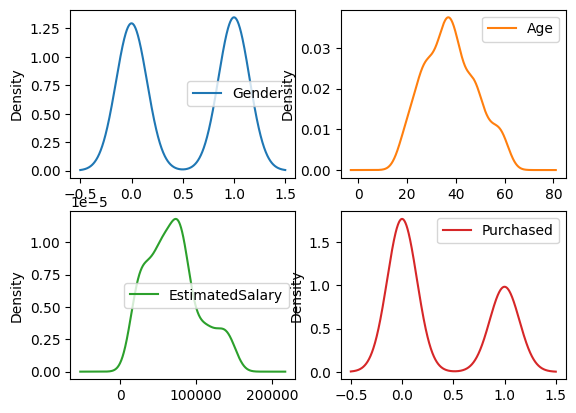

In [79]:
df.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()



Split the data into 80% train samples and 20% test samples, with random state 42. <br/>
Split the train into real train (70%) and validation (30%) with random state 42. <br/>
Apply the scaler on the train, validation and test sets. <br/>
Remember: when scaling the test, it should use all the training data.<br/>
Tip: For minimizing the loss function, what labels did we look at? Are they the same here?

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split 80,20 by random 42
X_train_val, X_test, y_train_val, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.2, random_state=42)

# Split 70 30 by randomm 42
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Implement the function Logistic_Regression_via_GD(P,y,lr):
-	Input: an np array ‘P’ of ‘n’ rows and ‘d’ columns, a label vector ‘y’ of ‘n’ entries and learning rate parameter ‘lr’.
-	Output: The function computes the output vector ‘w’ (and ‘b’) which minimzes the logistic regression cost function on ‘P’ and ‘y’. <br/>

The implementation should be fully yours. Don't use library implementation! <br/>
It should be done by implementing Gradient descent (with ‘lr’ as the learning rate) to solve logistic regression. <br/>

Tip: The gradients may be large, you can use $\frac{1}{n}\nabla{L}$ (which is the true empirical loss' gradient)



In [81]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_via_gd(X, y, lr, lamda=0, epochs=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    for _ in range(epochs):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)

        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (lamda * w / n_samples)
        db = (1 / n_samples) * np.sum(y_pred - y)

        w -= lr * dw
        b -= lr * db

    return w, b


Implement the function Predict(w,b,p):
-	Input: an input vector x which represents a sample, a vector (numpy) ‘w’ and a number ‘b’.
-	Output: the class prediction for ‘p’ of the logistic regression model defined by ‘w’ and ‘b’.

Note: It is your choice if use predictions of 1/-1 or 1/0. Make sure to adjust your choice to the true labels (for comparison).

In [82]:
def predict(w, b, p):
    z = np.dot(w, p.T) + b
    prediction = sigmoid(z)
    # return 1 if the probability is greater than or equal to 0.5, else return 0
    return (prediction >= 0.5).astype(int)


Call ‘Logistic_Regression_via_GD(P,y,lr)’, where ‘P’ and ‘y’ are the training data and the corresponding labels. <br/>
Try to find the best lr for the learning task.

In [83]:

    w_train, b_train = logistic_regression_via_gd(X_train_scaled, y_train, lr=0.01)




# **Run** the model on the test data, print the accuracy and plot hyperplane on the <u>test data</u> using ‘plot’ as defined above.

Accuracy on test data: 0.8875


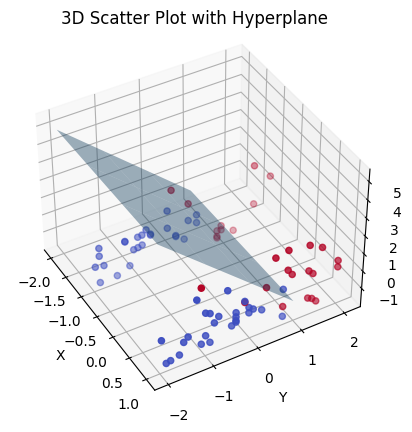

In [84]:


# Predict on test data
predictions = predict(w_train, b_train, X_test_scaled)

# Print the accuracy
accuracy = np.mean(predictions == y_test)
TESTACC=accuracy
print("Accuracy on test data:", accuracy)


plot(X_test_scaled, y_test, w_train, b_train)


To improve generalization, we use a tool that is called regularization. <br/>
In simple words,
$L_{\text{loss}}(w)=L_{\text{logistic-reg}}(w)+λ⋅‖w‖^2$. <br/>
Change ‘Logistic_Regression_via_GD’ according to that loss and find the best hyperparameter $λ$ using the performance on the <u>validation</u>.


In [85]:
def logistic_regression_with_regularization(X, y, lr, lamda=0, epochs=1000):
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    b = 0

    for _ in range(epochs):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)

        # Compute gradients with regularization
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + 2 * (lamda * w / n_samples)
        db = (1 / n_samples) * np.sum(y_pred - y)

        # Update weights and bias
        w -= lr * dw
        b -= lr * db

    return w, b

lamdas = np.arange(0, 5, 0.1)

for lamda in lamdas:
    w_train, b_train = logistic_regression_with_regularization(X_train_scaled, y_train, lr=0.01, lamda=lamda)

    predictions = predict(w_train, b_train, X_val_scaled)

    accuracy = np.mean(predictions == y_val)

    print(f"Validation accuracy for lambda={lamda:.2f}: {accuracy * 100:.2f}%")

    if accuracy >= best_accuracy:
        best_accuracy = accuracy
        best_lambda = lamda

print("Best lambda:", best_lambda)
print("Best accuracy on validation set:", best_accuracy * 100)


Validation accuracy for lambda=0.00: 80.21%
Validation accuracy for lambda=0.10: 80.21%
Validation accuracy for lambda=0.20: 80.21%
Validation accuracy for lambda=0.30: 80.21%
Validation accuracy for lambda=0.40: 79.17%
Validation accuracy for lambda=0.50: 79.17%
Validation accuracy for lambda=0.60: 79.17%
Validation accuracy for lambda=0.70: 79.17%
Validation accuracy for lambda=0.80: 79.17%
Validation accuracy for lambda=0.90: 79.17%
Validation accuracy for lambda=1.00: 79.17%
Validation accuracy for lambda=1.10: 79.17%
Validation accuracy for lambda=1.20: 79.17%
Validation accuracy for lambda=1.30: 79.17%
Validation accuracy for lambda=1.40: 79.17%
Validation accuracy for lambda=1.50: 79.17%
Validation accuracy for lambda=1.60: 79.17%
Validation accuracy for lambda=1.70: 79.17%
Validation accuracy for lambda=1.80: 79.17%
Validation accuracy for lambda=1.90: 79.17%
Validation accuracy for lambda=2.00: 79.17%
Validation accuracy for lambda=2.10: 79.17%
Validation accuracy for lambda=2

* *italicised text*Print* final test accuracy

In [86]:
# Implement here
accuracy=TESTACC
print(f"Test accuracy: {accuracy * 100}%")

Test accuracy: 88.75%


## Question 2 - SVM

You are given dataset for binary classification in 2D and aim to build the best SVM classifier.

import libraries

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

load npy file

In [88]:
import requests
from io import BytesIO

def load_npy_file(url):
  response = requests.get(url)
  if response.status_code == 200:
    npy_data = np.load(BytesIO(response.content), allow_pickle=True).item()
    return npy_data
  else:
    return None

load the data

In [89]:
data_dict = load_npy_file('https://sharon.srworkspace.com/ml/datasets/hw2/svm_data_2d.npy')

X_train = data_dict['X_train']
y_train = data_dict['y_train']
X_val = data_dict['X_val']
y_val = data_dict['y_val']

Look at the plot of the training data. <br/>
What _geometric_ shape could (almost) perfectly separate the data?<br/>
<font color='red'>Write here your answer and explain it</font>

There are two classes, one inside the other, meaning one surrounds the other. Therefore, we use the boundry

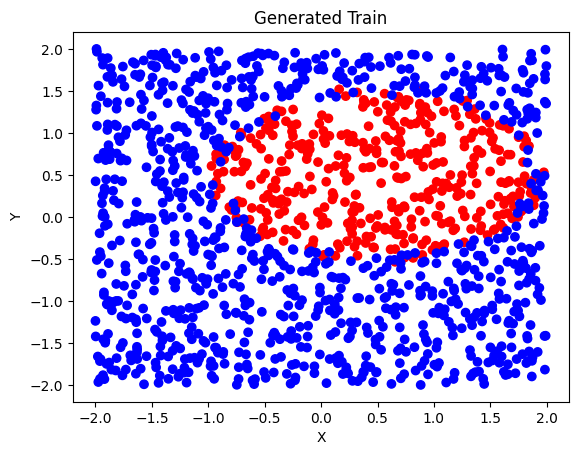

In [90]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Train')
plt.show()

Now, we want to separate the data using ellipsoid. <br/>
Its equation is:
$$Ax^2+By^2+Cx+Dy+e=0$$
Based on that equation, construct a mapping function into 4d space, such that the problem will become a linear ($w^t ϕ(x)+e=0$). <br/>
After the mapping, learn a linear classifier and print the hyperplane equation.<br/>
Note: after getting an output, I would recommend you to plot this equation on desmos, just to "see it".

In [91]:

new_features = np.column_stack((X_train[:, 0] ** 2, X_train[:, 1] ** 2, X_train[:, 0], X_train[:, 1]))

model = SVC(kernel='linear', C=10)
model.fit(new_features, y_train)

# Get the hyperplane equation coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_

# Print the hyperplane equation
equation_parts = []
for i in range(len(coefficients)):
    equation_parts.append(f"({coefficients[i]:.3f} * Φ(X{i+1}))")
equation = " + ".join(equation_parts) + f" + ({intercept[0]:.3f})"
print("Hyperplane equation:")
print(f" {equation}")


Hyperplane equation:
 (-3.991 * Φ(X1)) + (-9.132 * Φ(X2)) + (3.945 * Φ(X3)) + (9.144 * Φ(X4)) + (5.575)


Complete the missing lines to get plots on train and test

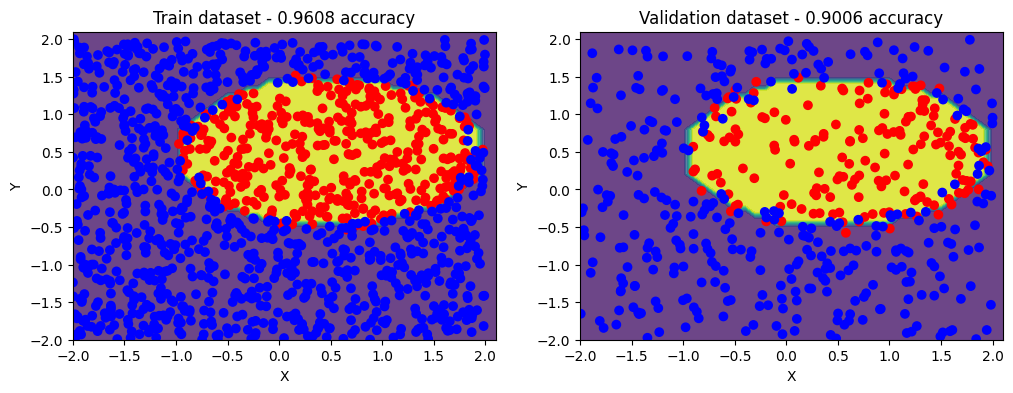

In [92]:
# Calculate predctions and accuracy for trainingset
train_features = np.column_stack((X_train[:, 0] ** 2, X_train[:, 1] ** 2, X_train[:, 0], X_train[:, 1]))
train_preds = model.predict(train_features)
train_acc = np.sum(train_preds == y_train) / len(y_train)

# Calculate predictios and acuracy forvalidation set
val_features = np.column_stack((X_val[:, 0] ** 2, X_val[:, 1] ** 2, X_val[:, 0], X_val[:, 1]))
val_preds = model.predict(val_features)
val_acc = np.sum(val_preds == y_val) / len(y_val)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
data = np.c_[xx.ravel(), yy.ravel()]


new_features = np.column_stack((data[:, 0] ** 2, data[:, 1] ** 2, data[:, 0], data[:, 1]))

# Predictions for meshgrid data
Z = model.predict(new_features)
Z = Z.reshape(xx.shape)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, Z, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {train_acc:.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, Z, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {val_acc:.4f} accuracy')

plt.show()


You will try also two other kernels:
  - kernel='poly', degree=4, C=10.
  -	kernel='rbf', gamma=1.5, C=10.

Based on those two models, along with the ellipsoid, which model generalizes the best? <br/>
<font color='red'>Write here your answer and explain it</font>

Based on the provided models and the nature of the data, the SVM with RBF kernel is likely to generalize best due to its ability to capture complex non-linear relationships.

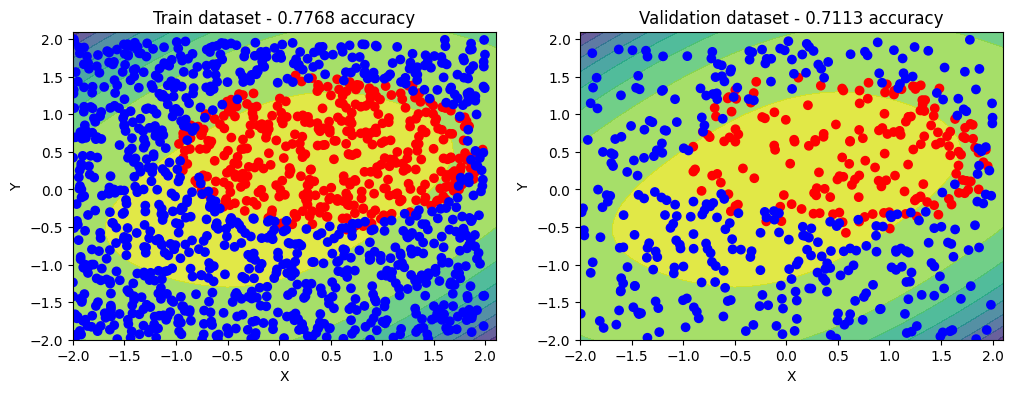

In [93]:
from sklearn.svm import SVC

# Poly kernel with degree4 model
model = SVC(kernel='poly', degree=4, C=10)
clf = model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]
P = model.decision_function(xy).reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, P, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {clf.score(X_train, y_train):.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, P, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {clf.score(X_val, y_val):.4f} accuracy')

plt.show()


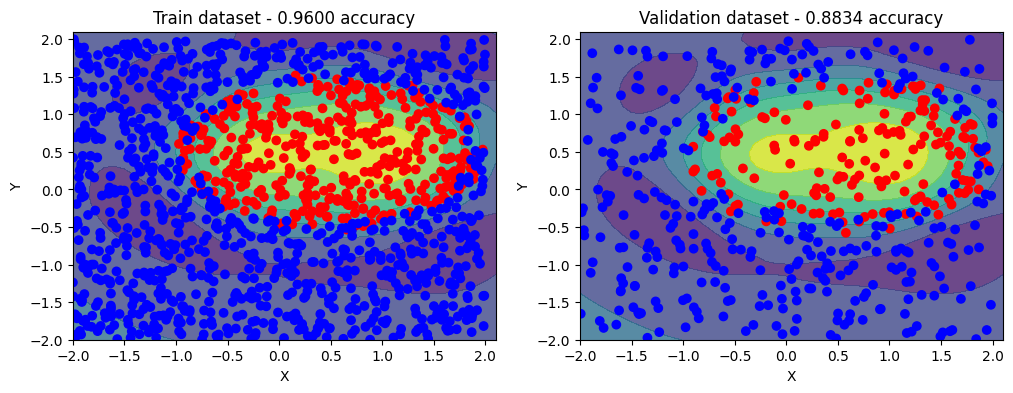

In [94]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', gamma=1.5, C=10)
clf = model.fit(X_train, y_train)

xx, yy = np.meshgrid(np.arange(-2, 2.2, 0.1), np.arange(-2, 2.2, 0.1))
xy = np.c_[xx.ravel(), yy.ravel()]

P = model.decision_function(xy).reshape(xx.shape)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot the training data on the first subplot
axs[0].contourf(xx, yy, P, alpha=0.8)
scatter1 = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].set_title(f'Train dataset - {clf.score(X_train, y_train):.4f} accuracy')

# Plot the validation data on the second subplot
axs[1].contourf(xx, yy, P, alpha=0.8)
scatter2 = axs[1].scatter(X_val[:, 0], X_val[:, 1], c=y_val, cmap='bwr')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')
axs[1].set_title(f'Validation dataset - {clf.score(X_val, y_val):.4f} accuracy')

plt.show()

Use the validation dataset to tune better hyperparameter for rbf (gamma). Use C=10 as before.

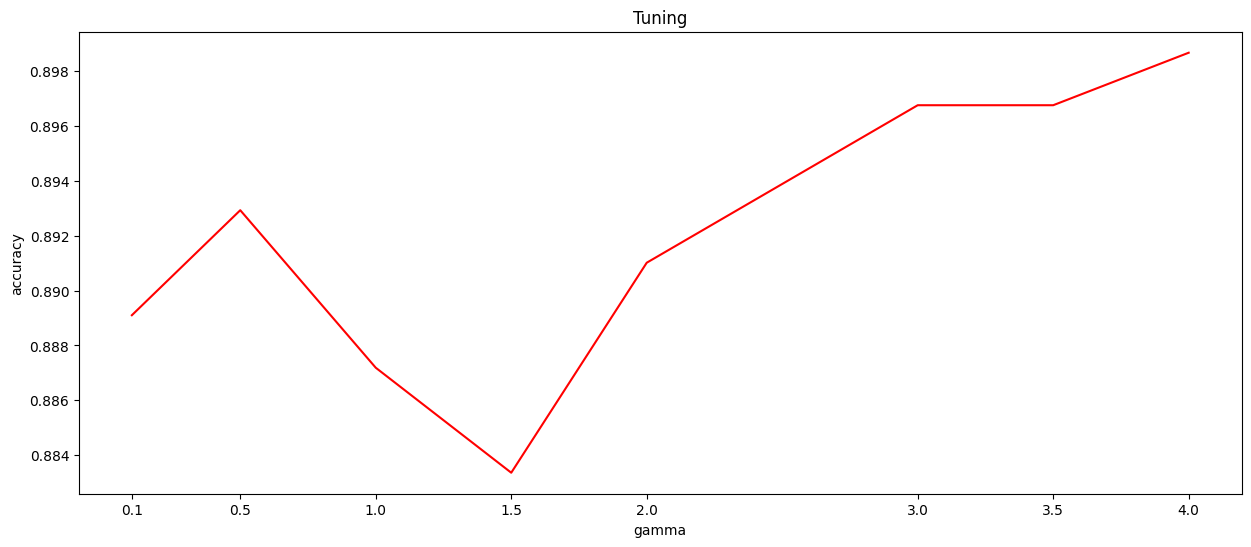

In [95]:
from sklearn.svm import SVC

gammas = [0.1, 0.5, 1.0, 1.5, 2.0,3.0,3.5,4.0]
accs = []

for gamma in gammas:
    model = SVC(kernel='rbf', gamma=gamma, C=10)
    clf = model.fit(X_train, y_train)
    acc = clf.score(X_val, y_val)
    accs.append(acc)

plt.figure(figsize=(15,6))
plt.plot(gammas, accs, color='red')
plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.title('Tuning')
plt.xticks(gammas)
plt.show()


Questions:
- Without coding, only from the plot, will the accuracy change using the best $\gamma$ you found? Why?
- Why did we use C=10? <br/>

<font color='red'>Write here your answer and explain it</font>

1. According to the graph, the accuracy may change with the choice of the best 𝛾, as 𝛾 affects the hardness of the decision boundary in SVM.
2. We used C=10 because it's a common value allowing for hard decision boundaries with low tolerance for noise, potentially aiding better model fit to the data and higher accuracy.

## Question 3 - Perceptron

You will implement perceptron via gradient descent.

The data set is taken from Andrew course on Coursera. The data consists of marks from two exams for 100 applicants and binary labels: 1 when applicant was admitted and 0 otherwise.

The objective is to build a classifier that can predict whether an application will be admitted to the university or not. We <u>will not</u> use test set, but only analyze the training.<br/>

The data is available here: https://sharon.srworkspace.com/ml/datasets/hw2/exams.csv

import libraries

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output


**Load** the data, plot it, and make sure you understand its shape.

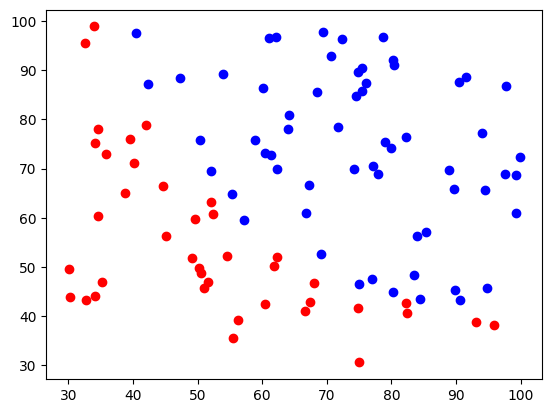

Shape of the data: (100, 3)


In [99]:
import pandas as pd

url = "https://sharon.srworkspace.com/ml/datasets/hw2/exams.csv"
data = pd.read_csv(url, sep = ",", header=None)

c0 = data[data[2] == 0].iloc[:, :2].values
c1 = data[data[2] == 1].iloc[:, :2].values

fig, ax = plt.subplots()
ax.scatter(c0[:, 0], c0[:, 1], c='red')
ax.scatter(c1[:, 0], c1[:, 1], c='blue')

plt.show()
print("Shape of the data:", data.shape)


Prepare the data by scaling it into 0-1 range (via MinMaxScaler)

*   List item
*   List item



In [101]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data.iloc[:, :2])

scaled_df = pd.DataFrame(scaled_data, columns=['exam1_scaled', 'exam2_scaled'])

scaled_df['admitted'] = data.iloc[:, 2]


Implement the function perceptron(data, labels, lr) which gets the train data along with labels and returns the weight vector learned by perceptron. <br/>
Note: if you choose to use iterations, don’t use more than 10,000 iterations.<br/>



In [102]:
def perceptron(data, labels, lr=1):
    num_features = data.shape[1]
    weights = np.zeros(num_features)

    bias = 0

    for _ in range(10000):
        # Flag
        updated = False

        # Iterate everyp ooint
        for i in range(len(data)):
            prediction = np.sign(np.dot(weights, data[i]) + bias)

            #Update the weight vector
            if prediction != labels[i]:
                weights += lr * labels[i] * data[i]
                bias += lr * labels[i]
                updated = True

        # If no updates were made in this iteration
        if not updated:
            break

    return weights,bias


In [103]:
def plot(train, labels, w, bias, show=True):
    # Create a figure and axis object
    fig, ax = plt.subplots()
    c0 = train[labels == -1]
    c1 = train[labels == 1]
    # Plot the data
    ax.scatter(c0[:,0], c0[:,1], c='red')
    ax.scatter(c1[:,0], c1[:,1], c='blue')
    a, b, c = w[0], w[1], bias
    # Compute the slope and y-intercept of the line
    m = -a / b
    b = -c / b
    # Generate some x values for the plot
    x = np.arange(np.min(train[:,0]), np.max(train[:,0]), 0.1)
    # Compute the corresponding y values using the equation of the line
    y = m * x + b
    # Plot the line
    plt.plot(x, y)
    # Add axis labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    preds = np.sign(np.dot(train, w) + bias)
    acc = np.count_nonzero(labels == preds) / len(labels)
    ax.set_title(f'Train accuracy is {acc}')
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    if show:
        plt.show()


Call the perceptron and plot function with your data.





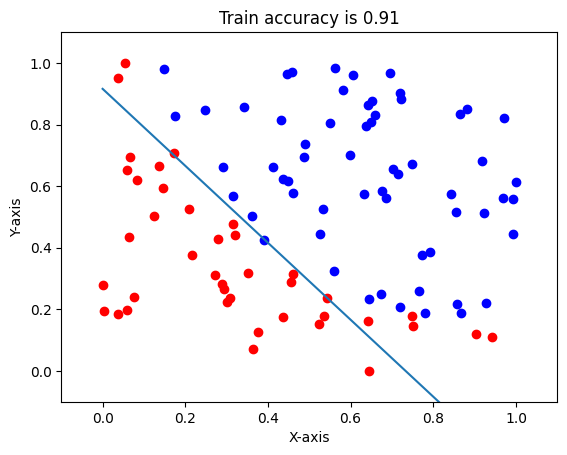

In [104]:
lables=data.iloc[:, -1].values
lables = np.array(lables)
lables[lables == 0] = -1
# Call the perceptron function to train the model
weights ,bias = perceptron(scaled_data, lables)

# Plot the data and the decision boundary
plot(scaled_data, lables, weights, bias)

Upgrade the “perceptron” function such that it will return array of weight vectors, from each
iteration during the process. Call the “plot_anim” function and wait untill you see approximate
converge - Do you really need many iterations? - Does perceptron converge on this dataset?
Write here your answer and explain it

no this dont need many iterations "Yes, the algorithm converges eventually to around 0.92. It fluctuates between 0.91 and 0.92 for several iterations."

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

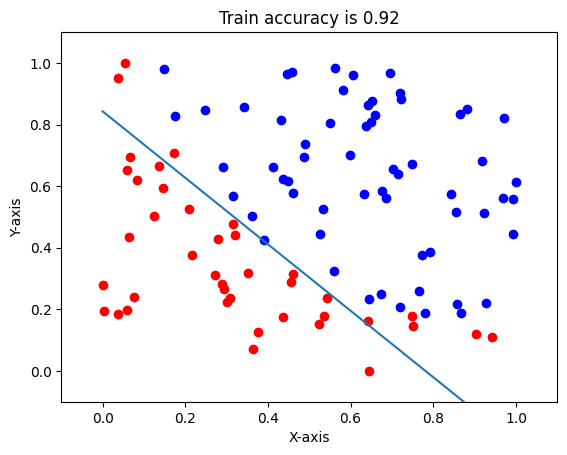

In [105]:
def perceptron(data, labels, lr=1):
    num_features = data.shape[1]
    weights = np.zeros(num_features)
    bias = 0
    weight_vectors = [np.append(weights.copy(), bias)]  # Initialize with initial weights and bias

    for _ in range(100):
        updated = False
        for i in range(len(data)):
            prediction = np.sign(np.dot(weights, data[i]) + bias)
            if prediction != labels[i]:
                weights += lr * labels[i] * data[i]
                bias += lr * labels[i]
                updated = True
        if not updated:
            break
        weight_vectors.append(np.append(weights.copy(), bias))

    return np.array(weight_vectors)


ws = perceptron(scaled_data, lables)

def plot_anim(ws):
    prev_w = None
    for ww in ws:
        plt.clf()
        w, bias = ww[:-1], ww[-1]
        plot(scaled_data, lables, w, bias, False)
        display(plt.gcf())
        clear_output(wait=True)

        if prev_w is not None and np.allclose(prev_w, w):
            break
        prev_w = w.copy()

plot_anim(ws)



We will extend the theory of convergence in perceptron to non-separable case:
Let ${\{x_i\} }_{i=1}^n$ be the training set and $R$ such that $∀i:‖x_i ‖≤R$.<br/>
The deviation of each sample is defined by $d_i= \max \{0,1-y_i (w^t x_i) \}$. <br/>
Let $D=‖d‖$, then the number of mistakes of the perceptron algorithm is upper bounded by $2(R+D)^2$.<br/>
Use this theorem to find (much) smaller number of iterations, use that exact number as upper bound and <u>report the train accuracy</u>.
Did it improve?<br/>
<font color='red'>Write here your answer and explain it</font>


i use 1000 iterations and the accuarcy reach to 0.92 , i send to percptron Upperbound=171 , the train acc -> 0.92

number bound: 179


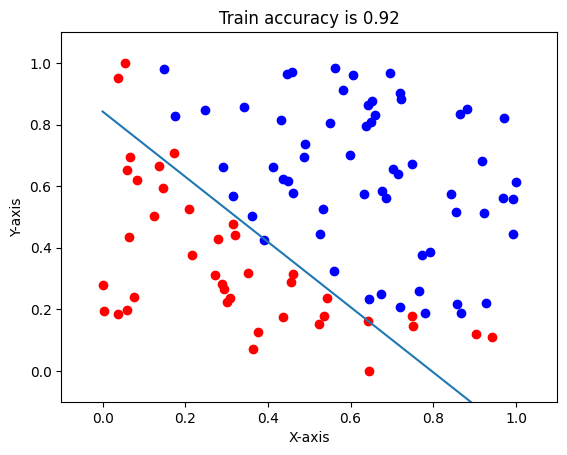

In [106]:
def perceptron_with_max_iteration(data, labels, max_iter, lr):
    num_features = data.shape[1]
    weights = np.zeros(num_features)
    bias = 0

    for _ in range(max_iter):
        updated = False
        for i in range(len(data)):
            prediction = np.sign(np.dot(weights, data[i]) + bias)
            if prediction != labels[i]:
                weights += lr * labels[i] * data[i]
                bias += lr * labels[i]
                updated = True
        if not updated:
            break

    return weights, bias

ws_T=ws.T
dimensions = ws_T.shape
ws_T = ws_T[:-1]
lables_T = lables.reshape(-1, 1)

R = np.max(np.linalg.norm(scaled_data, axis=1))
D = np.max(np.maximum(0, 1 - lables_T * np.dot(scaled_data,ws_T)))
bound = int(2*((R + D)**2))
print("number bound:",bound)

w, bias = perceptron_with_max_iteration(scaled_data, lables, bound, lr=0.01)
plot(scaled_data,lables,w,bias)



Remark: actually, $$d_i=\max \{ 0,γ-y_i (w^t x_i ) \}$$ and the bound is $$\left(\frac{R+D}{\gamma}\right)^2$$ where $$γ=\min⁡ \{y_i w^t x_i\}$$
By better measurement of the radius, we can get an even better bound. Its it not required here though.